In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as pl

In [2]:
# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

In [4]:
# Define the kernel function

'''
We also define the kernel function which uses the Squared Exponential, a.k.a Gaussian, 
a.k.a. Radial Basis Function kernel. It calculates the squared distance between points 
and converts it into a measure of similarity, controlled by a tuning parameter. Note 
that we are assuming a mean of 0 for our prior.
'''

def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

In [6]:
K_ss.shape

(50, 50)

In [7]:
# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

Text(0.5,1,'Three samples from the GP prior')

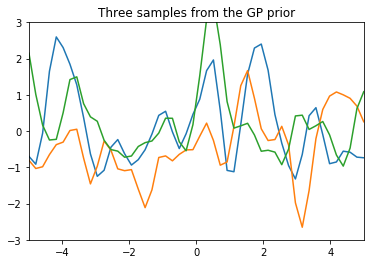

In [10]:
# Now let's plot the 3 sampled functions.
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')

In [11]:
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

In [12]:
# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

In [15]:
print(K.shape)
print(L.shape)

(5, 5)
(5, 5)


In [16]:
K

array([[1.00000000e+00, 6.73794700e-03, 2.06115362e-09, 2.86251858e-20,
        5.16642063e-55],
       [6.73794700e-03, 1.00000000e+00, 6.73794700e-03, 2.06115362e-09,
        1.80485139e-35],
       [2.06115362e-09, 6.73794700e-03, 1.00000000e+00, 6.73794700e-03,
        2.86251858e-20],
       [2.86251858e-20, 2.06115362e-09, 6.73794700e-03, 1.00000000e+00,
        2.06115362e-09],
       [5.16642063e-55, 1.80485139e-35, 2.86251858e-20, 2.06115362e-09,
        1.00000000e+00]])

In [17]:
# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

In [19]:
mu.shape

(50,)

In [20]:
# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

In [21]:
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

In [23]:
f_post.shape

(50, 3)

Text(0.5,1,'Three samples from the GP posterior')

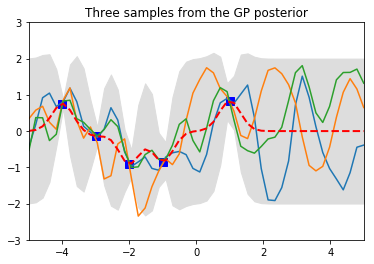

In [24]:
pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')